<a href="https://colab.research.google.com/github/imTheDevil/cat_dog_classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries, modules
try:
  # Use this command only if using GoogleColab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirectories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
#Creating image generator objects for train, validation and test; rescaling from 0 - 255 to 0 - 1
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

#Creating a data generator for train, validation and testing
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir, batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(directory=PATH, classes=['test'], target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size, shuffle=False,)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


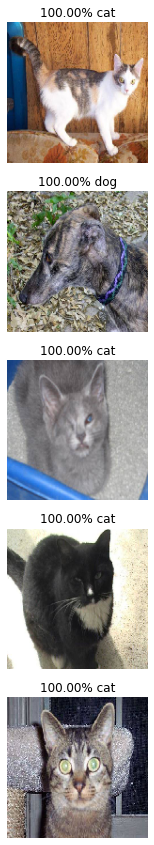

[0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1.]


In [ ]:
#Just a function to plot images
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen) #returns a tuple of train images and labels (probabilities 0 - cat, 1 - dog)
plotImages(sample_training_images[:5],_)
print(_)


In [ ]:
#Image Augumentation
train_image_generator = ImageDataGenerator(rescale=1./255,
rotation_range=40,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=True,
fill_mode='nearest',
validation_split = .2)
                                          
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
#Building the model

#CNN Layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#DNN Layers
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
#Compiling the model, assigning an optimizer - 'adam' and using 'SparseCategoricalCrossentropy' as loss function
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
#Training the model
history = model.fit(x=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)

Epoch 1/15
15/15 [==============================] - 30s 1s/step - loss: 1.5090 - accuracy: 0.5016 - val_loss: 0.6878 - val_accuracy: 0.5871
Epoch 2/15
15/15 [==============================] - 15s 1s/step - loss: 0.6941 - accuracy: 0.5192 - val_loss: 0.6925 - val_accuracy: 0.5033
Epoch 3/15
15/15 [==============================] - 15s 1s/step - loss: 0.6899 - accuracy: 0.5385 - val_loss: 0.6850 - val_accuracy: 0.5692
Epoch 4/15
15/15 [==============================] - 15s 1s/step - loss: 0.6744 - accuracy: 0.5983 - val_loss: 0.6741 - val_accuracy: 0.6060
Epoch 5/15
15/15 [==============================] - 15s 1s/step - loss: 0.6553 - accuracy: 0.6261 - val_loss: 0.6668 - val_accuracy: 0.6038
Epoch 6/15
15/15 [==============================] - 15s 1s/step - loss: 0.6536 - accuracy: 0.6309 - val_loss: 0.6530 - val_accuracy: 0.6138
Epoch 7/15
15/15 [==============================] - 15s 1s/step - loss: 0.6559 - accuracy: 0.6389 - val_loss: 0.6494 - val_accuracy: 0.6328
Epoch 8/15
15/15 [==

In [ ]:
test_loss, test_acc = model.evaluate(x=test_data_gen, verbose=1)
print(test_acc)

1/1 [==============================] - 1s 625ms/step - loss: 0.6963 - accuracy: 0.6000
0.6000000238418579


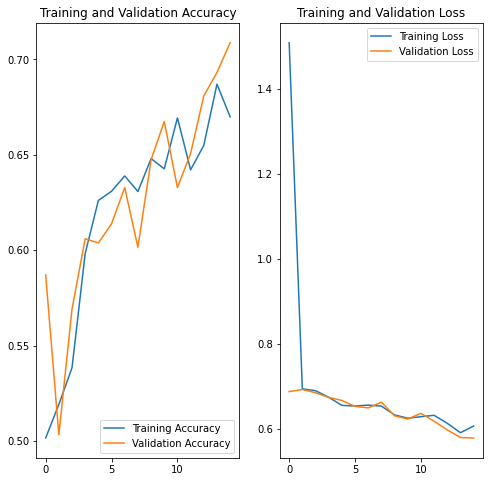

In [ ]:
#Visualising accuracy and loss of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_images, _ = next(test_data_gen)

#Predicting with test data
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
plotImages(test_images, probabilities=probabilities)

In [ ]:
#Verifying the results
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

print(f"Your model correctly identified {round(percentage_identified*100, 2)}% of the images of cats and dogs.")


Your model correctly identified 68.0% of the images of cats and dogs.
